# Ejemplos usando de árboles de decisión

En este cuaderno vamos a explorar los árbole de decisión utilizando scikit-learn. En esta ocación no vamos a preocuparnos por hacer la división entre datos de prueba y entrenamiento, simplemente vamos a ver cómo se comporta el método en distintos escenarios.

Usando la clase [sklearn.tree.DecisionTreeClassfier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification, make_moons
from sklearn.tree import DecisionTreeClassifier

In [4]:
plt.rc('font', family='serif')
%matplotlib inline

In [5]:
#""" Taken from Rashka's book """

def plot_decision_regions(X, y, classifier=None, resolution=0.02):
    """ Taken from Rashka's book """
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    x2_min, x2_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    
    if classifier is not None:
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black'
        )

# Base de datos de cancer de seno

In [6]:
import pandas as pd
datasetold=pd.read_csv(r"/home/war-machine/Documentos/DIPLOMADO_EAFIT/0X_CLASIFICACION/DT/wbc.csv")

descriptores=['concave points_mean','radius_mean']

salida=['diagnosis']

X=datasetold[descriptores]
#X=datasetold

y=datasetold.diagnosis=='M'
y *= 1

In [7]:
X=X.values
type(X)

numpy.ndarray

In [8]:
X.shape

(569, 2)

In [9]:
y=y.values
type(y)

numpy.ndarray

In [10]:
y.shape

(569,)

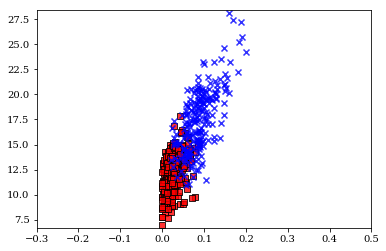

In [11]:
plot_decision_regions(X, y)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#Importamos el clasificador
from sklearn import tree

In [13]:
# instanciamos nuestro clasificador
dt = tree.DecisionTreeClassifier(max_depth=2, random_state=1,criterion='entropy')

# entrenamos nuestro clasificador
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

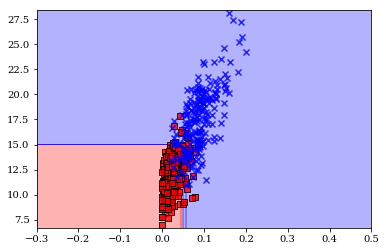

In [14]:
plot_decision_regions(X, y, classifier=dt)

Una vez entrenado, podemos exportar el árbol usando Graphviz

In [15]:
import graphviz 

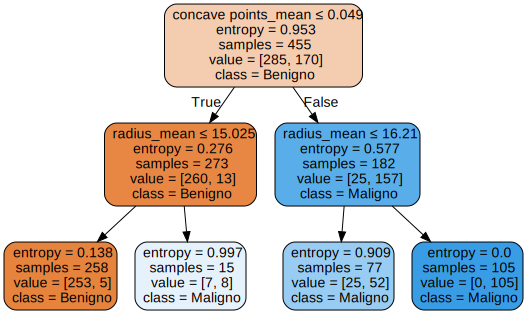

In [16]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=descriptores,  
                     class_names=['Benigno','Maligno'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [19]:
# prediccion
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 1 0 1 1]


In [20]:
print(y_test[0:5])

[0 1 0 1 1]


In [21]:
# importemos el accuracy score precisión
from sklearn.metrics import accuracy_score

# hagamos la prediccion
y_pred = dt.predict(X_test)

# calculemos la precisión  
acc = accuracy_score(y_test, y_pred)
print("precisión de test: {:.2f}".format(acc))

precisión de test: 0.92


## Datos linealmente separables sin ruido


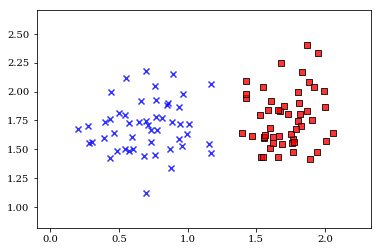

In [22]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1,
                           scale=0.5, shift=2)

rng = np.random.RandomState(42)
X += 0.5 * rng.uniform(size=X.shape)
plot_decision_regions(X, y)

In [23]:
type(X)
X.shape

(100, 2)

In [24]:
type(y)
y.shape

(100,)

In [25]:
y[:10]

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [26]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

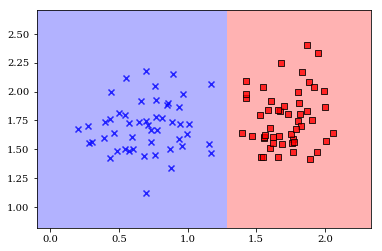

In [27]:
plot_decision_regions(X, y, classifier=tree)

## Datos linealmente separables con ruido

En este caso puedes intentar distintos valores de `max_depth`, para darte cuenta de cómo este valor puede producir *overfitting*

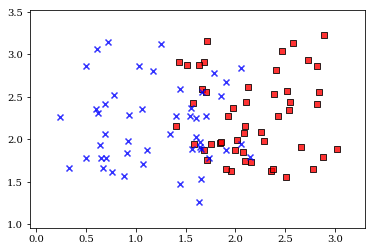

In [28]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1,
                           scale=0.5, shift=2)

rng = np.random.RandomState(42)
X += 1.5 * rng.uniform(size=X.shape)
plot_decision_regions(X, y)

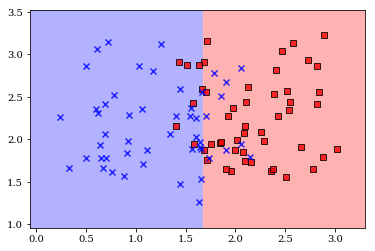

In [29]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)
plot_decision_regions(X, y, classifier=tree)

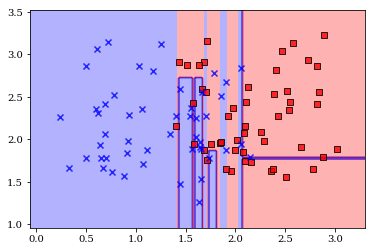

In [30]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X, y)
plot_decision_regions(X, y, classifier=tree)

## Caso no lineal

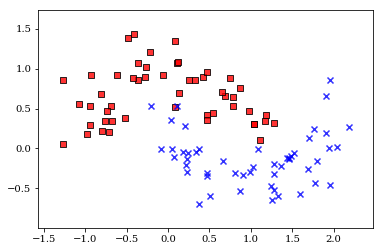

In [31]:
X, y = make_moons(noise=0.2)
plot_decision_regions(X, y)

primero, observemos lo que un clasificador lineal puede hacer con un data set como este.

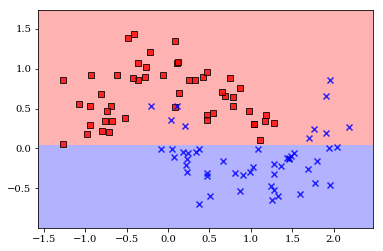

In [32]:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X, y)
plot_decision_regions(X, y, classifier=tree)

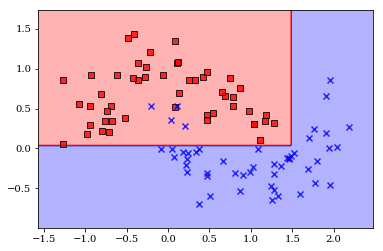

In [33]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)
plot_decision_regions(X, y, classifier=tree)

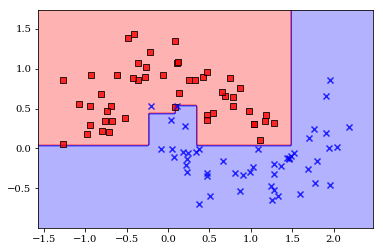

In [34]:
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X, y)
plot_decision_regions(X, y, classifier=tree)